###  Run Data Exploration
For each Dataset: 
- Plot Datainstances by class
- Calculate MAE after rescaling data to MinMax for comaparability 
- Calculate Pearson Correlation Coeff 

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from utils.explanations import minmax_norm
from utils.utils import read_dataset
import numpy as np
import os
import pandas as pd

root_dir = 'G:/Meine Ablage/master thesis/code/xai-tsc'
archive_name = 'ucr'


# Visaul Exploration
def plot_classwise_ts_data(dataset): 
    datasets_dict = read_dataset(root_dir, archive_name, dataset_name, 'original', 1)
    x_train, y_train, x_test, y_test = datasets_dict[dataset_name]
    fig, axes = plt.subplots(nrows=1, ncols=len(np.unique(y_train.flatten())), figsize=(20, 5))
    for i,y in enumerate(np.unique(y_train.flatten())):
        for ts in (np.where(y_train.flatten()==y)[0]):
            axes[i].plot(x_train[ts])
            axes[i].set_title(f"{dataset_name} - Class {i}")
    plt.show()
    fig, axes = plt.subplots(nrows=1, ncols=len(np.unique(y_train.flatten())), figsize=(20, 5))
    for i,y in enumerate(np.unique(y_test.flatten())):
        for ts in (np.where(y_test.flatten()==y)[0]):
            axes[i].plot(x_test[ts])
            axes[i].set_title(f"{dataset_name} - Class {i}")
    plt.show()


#MAE over all dataset instances and classwise: 
def calculate_inbetween_distance(dataset_name):
    #load dataset

    datasets_dict = read_dataset(root_dir, archive_name, dataset_name, 'original', 1)
    x_train, y_train, x_test, y_test = datasets_dict[dataset_name]

    output = []
    for x_vals,y_vals in [[x_train,y_train],[x_test,y_test]]:
        mean_inbetween_distance = 0 
        mean_inbetween_distance_classwise = dict()
        for x,y in zip(x_vals,y_vals):
            if int(y) not in mean_inbetween_distance_classwise.keys(): mean_inbetween_distance_classwise[int(y)] = []
            for x_n,y_n in zip(x_vals,y_vals):
                if np.array_equal(x,x_n): continue
                mae = mean_absolute_error(minmax_norm(x),minmax_norm(x_n))
                if y == y_n: mean_inbetween_distance_classwise[int(y)].append(mae)
                mean_inbetween_distance += mae
        classwise_dist = []
        for k in mean_inbetween_distance_classwise.keys():
            mean_inbetween_distance_classwise[k] = sum(mean_inbetween_distance_classwise[k]) / len(mean_inbetween_distance_classwise[k])
            classwise_dist.append(mean_inbetween_distance_classwise[k]) 
        mean_inbetween_distance = mean_inbetween_distance / len(x_vals)
        output.append([mean_inbetween_distance, *classwise_dist])
    return pd.DataFrame(output, columns = ["MAE diff", *[f'class {i}'for i in range(len(np.unique(y_train)))]])



#Pearson over all dataset instances and classwise: 
def calculate_inbetween_corr(dataset_name):
    #load dataset

    datasets_dict = read_dataset(root_dir, archive_name, dataset_name, 'original', 1)
    x_train, y_train, x_test, y_test = datasets_dict[dataset_name]

    output = []
    for x_vals,y_vals in [[x_train,y_train],[x_test,y_test]]:
        mean_inbetween_corr = 0 
        mean_inbetween_corr_classwise = dict()
        for x,y in zip(x_vals,y_vals):
            if int(y) not in  mean_inbetween_corr_classwise.keys():  mean_inbetween_corr_classwise[int(y)] = []
            for x_n,y_n in zip(x_vals,y_vals):
                if np.array_equal(x,x_n): continue
                corr = np.corrcoef(x,x_n)[0,1]
                if y == y_n: mean_inbetween_corr_classwise[int(y)].append(corr)
                mean_inbetween_corr += corr
        classwise_dist = []
        for k in mean_inbetween_corr_classwise.keys():
            mean_inbetween_corr_classwise[k] = sum(mean_inbetween_corr_classwise[k]) / len(mean_inbetween_corr_classwise[k])
            classwise_dist.append(mean_inbetween_corr_classwise[k]) 
        print(len(x_vals))
        mean_inbetween_corr = mean_inbetween_corr / len(x_vals)
        output.append([mean_inbetween_corr, *classwise_dist])
    return pd.DataFrame(output, columns = ["Corr diff", *[f'class {i}'for i in range(len(np.unique(y_train)))]])


#calculate_inbetween_distance("GunPoint")
calculate_inbetween_corr("GunPoint")

50
150


,Corr diff,class 0,class 1
0,37.437165,0.688435,0.870892
1,116.756806,0.871863,0.712171


### Data Exploration GunPoint

In [ ]:
plot_classwise_ts_data

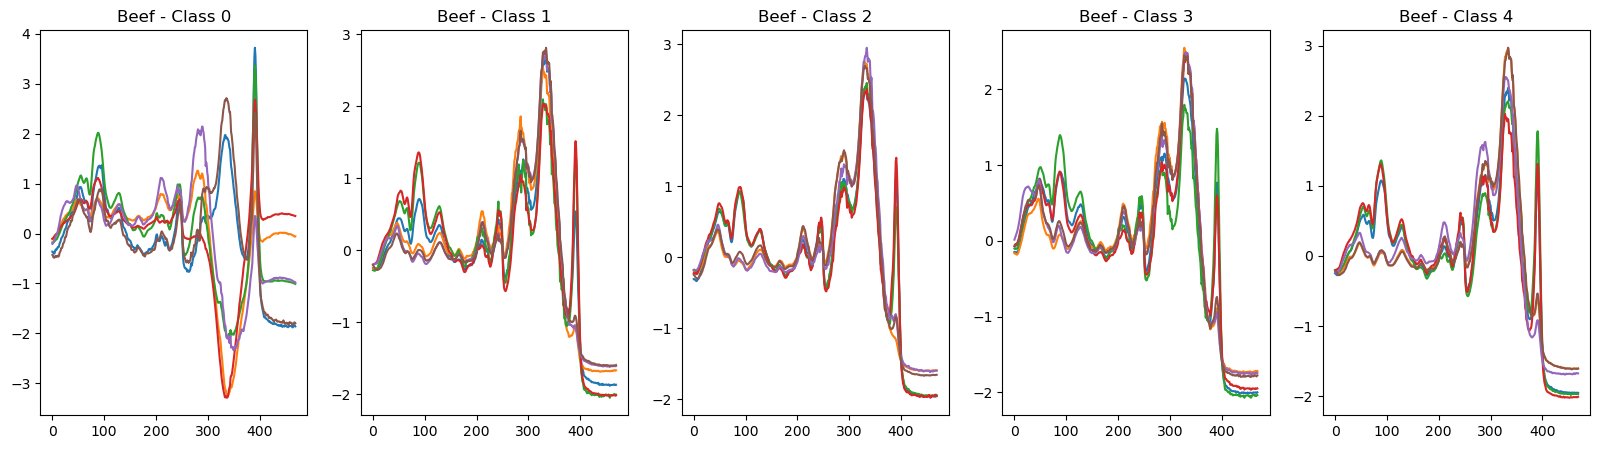

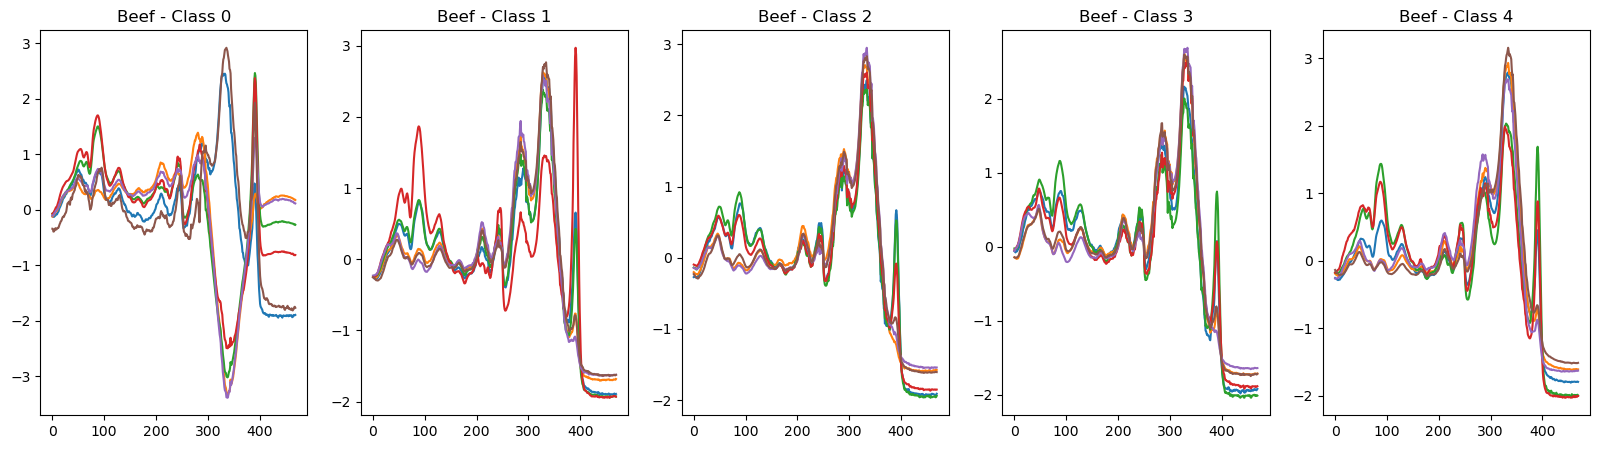

In [97]:
%matplotlib inline
import matplotlib.pyplot as plt

dataset_name = 'Beef'


plot_classwise_ts_data(dataset_name)

In [84]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from utils.explanations import minmax_norm
from utils.utils import read_dataset
import numpy as np
import os
import pandas as pd

root_dir = 'G:/Meine Ablage/master thesis/code/xai-tsc'
archive_name = 'ucr'

#run over all datasets: 
def calculate_inbetween_distance(dataset_name):
    #load dataset

    datasets_dict = read_dataset(root_dir, archive_name, dataset_name, 'original', 1)
    x_train, y_train, x_test, y_test = datasets_dict[dataset_name]

    output = []
    for x_vals,y_vals in [[x_train,y_train],[x_test,y_test]]:
        mean_inbetween_distance = 0 
        mean_inbetween_distance_classwise = dict()
        for x,y in zip(x_vals,y_vals):
            mean_inbetween_distance_classwise[int(y)] = []
            for x_n,y_n in zip(x_vals,y_vals):
                if np.array_equal(x,x_n): continue
                mae = mean_absolute_error(minmax_norm(x),minmax_norm(x_n))
                if y == y_n: mean_inbetween_distance_classwise[int(y)].append(mae)
                mean_inbetween_distance += mae
        classwise_dist = []
        for k in mean_inbetween_distance_classwise.keys():
            mean_inbetween_distance_classwise[k] = sum(mean_inbetween_distance_classwise[k]) / len(mean_inbetween_distance_classwise[k])
            classwise_dist.append(mean_inbetween_distance_classwise[k]) 
        print(classwise_dist)
        mean_inbetween_distance = mean_inbetween_distance / len(x_vals)

        output.append([mean_inbetween_distance] + [classwise_dist])
    return output
distances = calculate_inbetween_distance('GunPoint')

#15.392490723221451 {-1: 0.1642406900342371, 1: 0.10929426415270826}
#3.7810051950669235 {1: 0.2535723539114696,  2: 0.07805331585756228, 3: 0.056529535467279304, 4: 0.052985928582427386, 5: 0.08730261301622906}

[0.25307529569488646, 0.17060690439081116]
[0.19726825615976343, 0.22743181857639005]


In [86]:
pd.DataFrame(distances)

,0,1
0,9.812383,"[0.25307529569488646, 0.17060690439081116]"
1,28.540145,"[0.19726825615976343, 0.22743181857639005]"


[0.22730190788412827, 0.22730190788412824]
[0.22730190788412807, 0.22730190788412805]


In [90]:
corrs

[[37.43716511795166, [0.22730190788412827, 0.22730190788412824]],
 [116.75680618239024, [0.22730190788412807, 0.22730190788412805]]]